In [10]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import collections.abc
import json

def aggregate_and_means(data):
    means = np.array([])
    for (s_id, reps) in data.items():
        reps = reps['reps']
        avg = np.nanmean(list(reps.values()))
        means = np.append(means, avg)
        # count how many non-nan values
        r_count = (~np.isnan(list(reps.values()))).sum()
        data[s_id] = {'count': int(r_count), 'mean': avg, 'reps': reps}

    return means, data

def plot_normal(data, ax, title):
    ax.set_xlim(left=-0.125, right=1.0)
    count_, bins, _ = ax.hist(data, bins=N_BINS_NORMAL, density=True)
    # fitting curve
    mu, std = norm.fit(data)
    xs = np.arange(-0.125, 1.0, 0.01)
    ax2 = ax.twinx()
    ax2.plot(
             xs,
             norm.cdf(xs, loc=mu, scale=std),
             linewidth=2, color='r', label=f'$\mu={mu:.3f}$,\n$stdev={std:.3f}$'
            )
    ax2.set_ylabel(f"$CDF_{{\mu,\sigma}}$")
    ax2.legend()

    ax.axvline(mu, color='k', linestyle='dashed', linewidth=1)
    ax2.axhline(norm.cdf(mu, loc=mu, scale=std),
               color='k', linestyle='dashed', linewidth=1)
    ax.annotate(f'{mu:.2f}', xy=(mu, 0), xytext=(mu, -1.5))
    ax.set_title(title)
    ax.grid()

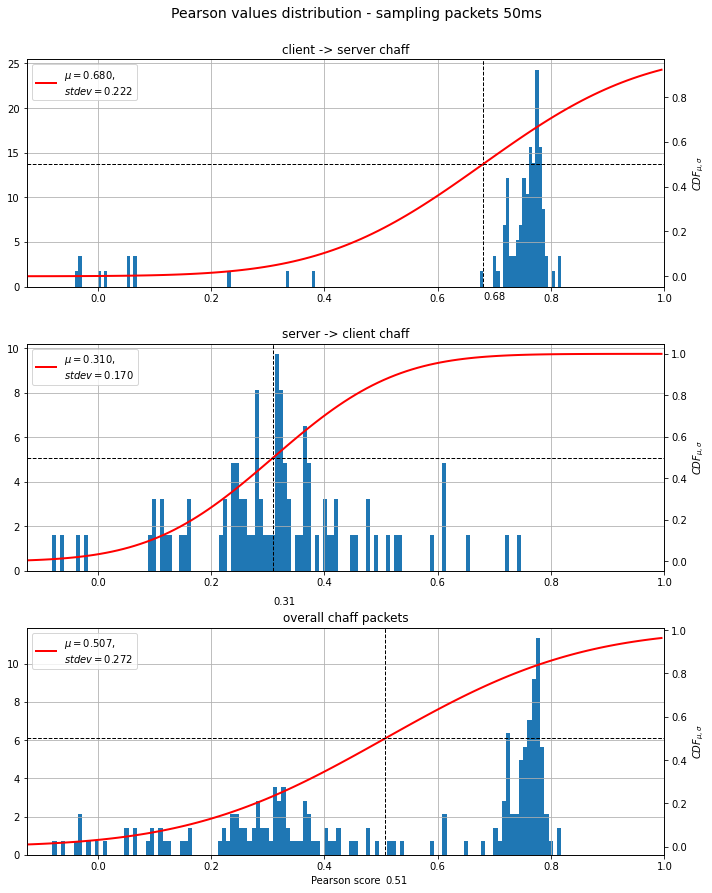

In [22]:
file = "../results/pearson/front/aggregate_50/res_dummy.json"

N_BINS_NORMAL = 150

with open(file, "r") as f:
    jsonfile = json.load(f)
pearsons_TX = jsonfile['TX']
pearsons_RX = jsonfile['RX']


(tx_means, pearsons_TX) = aggregate_and_means(pearsons_TX)
(rx_means, pearsons_RX) = aggregate_and_means(pearsons_RX)

# cleanup values
tx_means = tx_means[~np.isnan(tx_means)]
rx_means = rx_means[~np.isnan(rx_means)]
assert (not np.isnan(tx_means).any())
assert (not np.isnan(rx_means).any())

f, ax = plt.subplots(3, 1, figsize=(10, 12))
# plot dummy TX
plot_normal(tx_means, ax[0], 'client -> server chaff')
# plot dummy RX
plot_normal(rx_means, ax[1], 'server -> client chaff')
# plot all
plot_normal(np.append(rx_means, tx_means),
            ax[2],
            "overall chaff packets")
ax[2].set_xlabel("Pearson score")
f.suptitle('Pearson values distribution - sampling packets 50ms', y=1.03, fontsize=14)
f.tight_layout()
f.show()